# Exercícios - Forecasting Séries Temporais

## 

### Questão 1

Com os dados do _dataset_ `airline_passengers.csv`, verifique utilizando o teste de Dickey-Fuller Aumentado a estacionaridade dos dados abaixo:

__A)__ Dados originais do _dataset_;

__B)__ Primeira Diferença dos Dados;

__C)__ Segunda Diferença dos Dados.

### Resolução:

__A)__ Dados originais do _dataset_;

In [1]:
# Import das principais libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carrega o dataset de passageiros
passageiros = pd.read_csv('airline_passengers.csv', 
                          index_col=0,
                          parse_dates=True)

In [3]:
# Define o periodo de variação como mensal
passageiros.index = passageiros.index.to_period("M")

In [4]:
# Mostra as primeiras linhas do dataset
passageiros.head()

,Milhares de passageiros
Mês,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [5]:
# Import do teste de Dickey Fuller
from statsmodels.tsa.stattools import adfuller

In [8]:
# Define o y como os dados do dataset
y = passageiros.values

# Aplicação do Teste
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
 

# Verifica a estacionariedade
if result[1] < 0.05:
    print('É Estacionário!')
else:
    print('Não é Estacionário!')

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Não é Estacionário!


__B)__ Primeira Diferença dos Dados;

In [9]:
# Define o y como os dados do primeira diferença
y1 = np.diff(passageiros['Milhares de passageiros'])

# Aplicação do Teste
result = adfuller(y1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
 

# Verifica a estacionariedade
if result[1] < 0.05:
    print('É Estacionário!')
else:
    print('Não é Estacionário!')

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Não é Estacionário!


__C)__ Segunda Diferença dos Dados.

In [10]:
# Define o y como os dados do primeira diferença
y2 = np.diff(y1)

# Aplicação do Teste
result = adfuller(y2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
 

# Verifica a estacionariedade
if result[1] < 0.05:
    print('É Estacionário!')
else:
    print('Não é Estacionário!')

ADF Statistic: -16.384232
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
É Estacionário!


## 

### Questão 2

Uma forma de garantir a estacionariedade de uma série temporal, seria justamente aplicando transformações nas Séries temporais. Vamos utilizar a base de dados sobre o valor de fechamento do Starbucks do `starbucks.csv` e aplicar o teste de Dickey-Fuller Aumentado para os seguintes dados:

__A)__ Dados Originais;

__B)__ _log_ dos Dados;

__C)__ Raiz Quadrada dos Dados;

__D)__ Raiz Cúbica dos Dados;

__E)__ Primeira Diferença dos Dados.

### Resolução:

__A)__ Dados Originais;

In [11]:
# Import das libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Carrega o dataset
starbucks = pd.read_csv('starbucks.csv',index_col='Date',parse_dates=True)

In [13]:
# Define o periodo de variação como diario
starbucks.index = starbucks.index.to_period("D")

In [14]:
# Mostra as primeiras linhas do dataset
starbucks.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [15]:
# Define o y
y = starbucks['Close']

# Aplica o teste
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
 
# Verifica a estacionariedade
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

ADF Statistic: -3.048094
p-value: 0.030641
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
É Estacionário


__B)__ _log_ dos Dados;

In [16]:
# Define o y
y = np.log(starbucks['Close'])

# Aplica o teste
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Verifica a estacionariedade
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

ADF Statistic: -3.395504
p-value: 0.011113
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
É Estacionário


__C)__ Raiz Quadrada dos Dados;

In [17]:
# Define o y
y = np.sqrt(starbucks['Close'])

# Aplica o teste
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Verifica a estacionariedade
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

ADF Statistic: -3.211531
p-value: 0.019327
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
É Estacionário


__D)__ Raiz Cúbica dos Dados;

In [18]:
# Define o y
y = np.cbrt(starbucks['Close'])

# Aplica o teste
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Verifica a estacionariedade
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

ADF Statistic: -3.270493
p-value: 0.016250
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
É Estacionário


__E)__ Primeira Diferença dos Dados.

In [19]:
# Define o y
y = np.diff(starbucks['Close'])

# Aplica o teste
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Verifica a estacionariedade
if result[1] < 0.05:
    print('É Estacionário')
else:
    print('Não é Estacionário')

ADF Statistic: -30.716482
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
É Estacionário


Apesar de todos os itens serem estacionários, aplicar a primeira diferença mostrou ser o mais eficiente pois representa o menor valor de p-value.

## 

### Questão 3

Utilizando a base de dados sobre a emissão de $CO_2$, obtido da própria biblioteca do _statsmodels_ a partir do código abaixo:

```python
import statsmodels.api as sm
data = sm.datasets.co2.load_pandas()
y = data.data

```

__A)__ Desenvolva um modelo SARIMA iterando os valores de (p, d, q) e (P, D, Q) sazonal, definindo  qual a melhor combinação de parâmetros para o modelo a partir do valor do AIC;

__B)__ Treine o modelo com os melhores parâmetros e avalie o desempenho das previsões;

__C)__ Faça 500 previsões futuras e plote o gráfico das previsões e o intervalo de confiança para elas.

### Resolução:

__A)__ Desenvolva um modelo SARIMA iterando os valores de (p, d, q) e (P, D, Q) sazonal, definindo  qual a melhor combinação de parâmetros para o modelo a partir do valor do AIC;

In [33]:
# import das libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [34]:
# Import da API do statsmodels
import statsmodels.api as sm

# carrega os dados sobre CO2
data = sm.datasets.co2.load_pandas()
y = data.data

In [35]:
# Resample com as médias
y = y['co2'].resample('MS').mean()

# A função bfill preenche os NaNs com o valor da observação anterior
y = y.fillna(y.bfill())

# Print do y
print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64


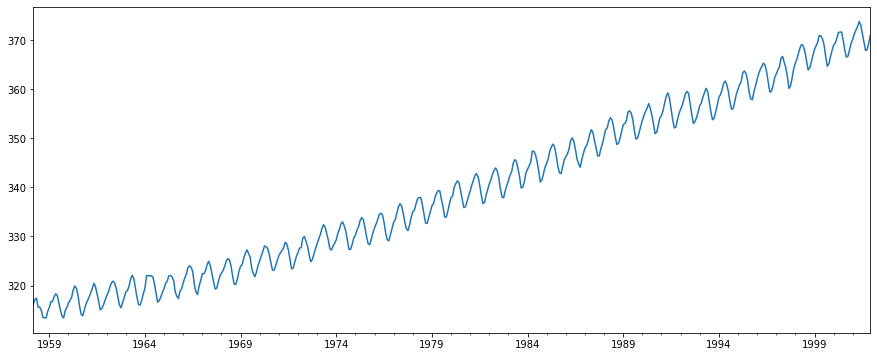

In [36]:
# Representação do Histórico
y.plot(figsize=(15, 6))

# Mostra o gráfico
plt.show()

In [37]:
# Carrega o itertools
import itertools

# Define os parametros p, d e q como valores entre 0 e 2
p = d = q = range(0, 2)

# Gera as diferentes combinações
pdq = list(itertools.product(p, d, q))

# Gera as combinações para a sazonalidade (12 significa uma sazonalidade mensal)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Print de algumas combinações
print('Exemplos de Combinações para o SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Exemplos de Combinações para o SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [38]:
# Import do warning para ignorar os casos que não for possivel calcular o Arima
import warnings
warnings.filterwarnings("ignore") 

# Loop para testar as combinações
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:6787.3436240372475
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1854.8282341412219
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1596.7111727640386
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1058.9388921320021
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1056.2878414561992
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1361.6578978076
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1044.7647912641196
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:6881.04875557187
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:6072.662327738417
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1379.1941067320702
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1241.4174716805837
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1085.5130802296683
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:780.4314293084005
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1119.5957893607656
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:807.091298852015
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1675.8086923024293
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1240.2211199194085
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:633

__B)__ Treine o modelo com os melhores parâmetros e avalie o desempenho das previsões;


In [39]:
# Definição e FIt do Modelo
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

# fit do Modelo
results = mod.fit()

In [40]:
# Calcula as predições a partir de 1998
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)

# Calcula o intervalo de confiança
pred_ci = pred.conf_int()

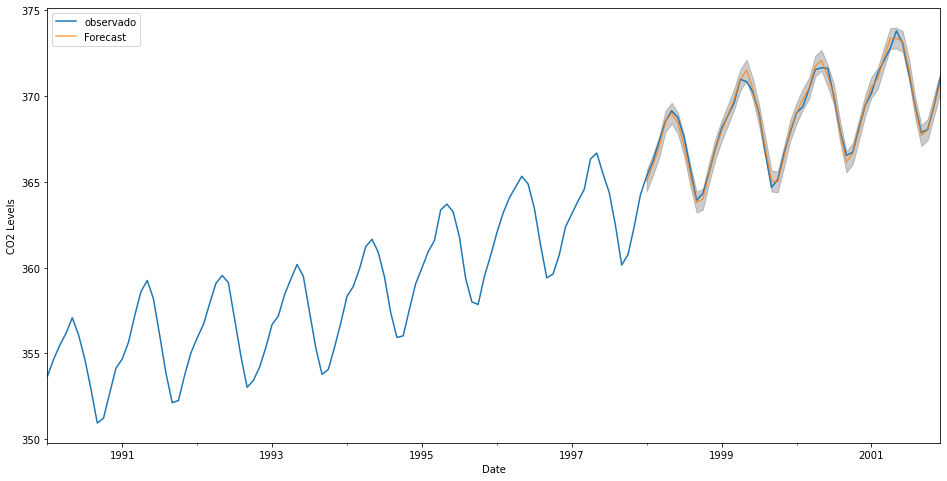

In [41]:
# Plot com o Forecasting
# define o tmanho da figura
plt.figure(figsize=(16,8))

# Cria os gráficos
ax = y['1990':].plot(label='observado')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

# plot do intervalo de confiança
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

# PArâmetros dos Eixos
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

# Coloca legenda
plt.legend()

# Mostra o Gráfico
plt.show()

__C)__ Faça 500 previsões futuras e plote o gráfico das previsões e o intervalo de confiança para elas.

In [43]:
#Vamos fazer 500 predições futuras
pred_uc = results.get_forecast(steps=500)

# Define o intervalo de confiança para o Forecasting
pred_ci = pred_uc.conf_int()

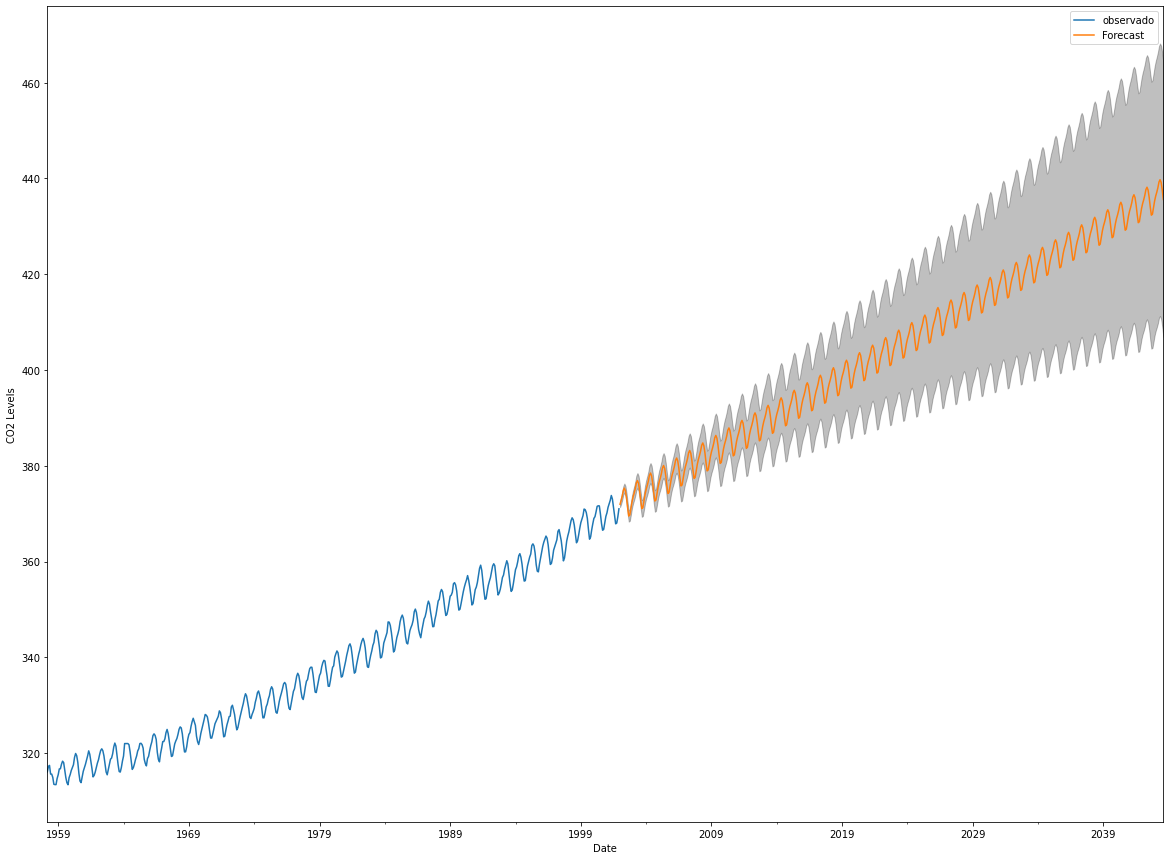

In [45]:
# Plot das previsões futuras
ax = y.plot(label='observado', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

# define os parametros dos eixos
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

# coloca legenda
plt.legend()

# mostra o gráfico
plt.show()

## 

### Questão 4

Com o _dataset_ `covid_saopaulo.csv`, treine um modelo SARIMA com 90% dos dados e faça predições para avalair o desempenho do modelo.

__Dica.:__ utilize a biblioteca `auto_arima` para fazer as iterações dos parâmetros do modelo SARIMA:
        
```python
! pip install pmdarima
from pmdarima import auto_arima

```

### Resolução:

Instalando o `pmdarima`:

In [46]:
# Instalando a Lib do auto_arima
! pip install pmdarima

In [48]:
# Carrega as principais libs para esse exercício
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

In [58]:
# Carrega o dataset
covidSP = pd.read_csv('covid_saopaulo.csv', index_col='date', parse_dates=True)

# Acerta o index como range de datas
idx = pd.date_range(start=covidSP.index.min(), end=covidSP.index.max(), freq='D')

# Reindex do dataset
covidSP = covidSP.reindex(idx)

# Preenche os valores nulos
covidSP.fillna(0,inplace=True)

In [49]:
# Ajuste de modelo SARIMA utilizando o auto_arima
# Vai utilizar um metodo iterativo analogo do exercício anterior

# Define o auto_arima
auto_arima(covidSP['deaths'],seasonal=True,m=7).summary()

# Fit do auto_arima
stepwise_fit = auto_arima(covidSP['deaths'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=7,
                          seasonal=True,
                          trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

# Resultado
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=3579.716, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3825.903, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3563.494, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3581.821, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3823.921, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=3808.539, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=3519.108, Time=0.43 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=3488.255, Time=0.66 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=3486.546, Time=0.36 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=3683.983, Time=0.11 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=3488.166, Time=0.71 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=3635.827, Time=0.24 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=3454.120, Time=0.53 sec
 ARIMA(2,1,0)(0,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  309
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1687.560
Date:                           Sun, 22 Aug 2021   AIC                           3383.121
Time:                                   22:39:46   BIC                           3398.041
Sample:                                        0   HQIC                          3389.087
                                           - 309                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9213      0.023    -39.982      0.000      -0.966      -0.876
ar.S.L7        0.9657      0.018     53.037      0.000       0.930       1.001
ma.S.L7       -0.6361      0.053    -12.074      0.000      -0.739      -0.533
sigma2      3250.8511    145.586     22.329      0.000    2965.508    3536.194
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):               415.02
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               2.79   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Vamos separar a base em treino e teste, dado que já temos a melhor combinação de parâmetros para o SARIMA:

In [50]:
# Tamanho da base
len(covidSP)

309

In [51]:
# Atribuir 90% de treino
len(covidSP)*0.9

278.1

In [52]:
# Separando em treino e teste
train = covidSP.iloc[:278]
test = covidSP.iloc[278:]

In [53]:
# Preparando o modelo SARIMAX
modelo = SARIMAX(train['deaths'],order=(0,1,1),seasonal_order=(1,0,1,7))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                            deaths   No. Observations:                  278
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1504.094
Date:                           Sun, 22 Aug 2021   AIC                           3016.188
Time:                                   22:42:31   BIC                           3030.684
Sample:                               02-26-2020   HQIC                          3022.004
                                    - 11-29-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9181      0.024    -38.829      0.000      -0.964      -0.872
ar.S.L7        0.9652      0.018     54.003      0.000       0.930       1.000
ma.S.L7       -0.6308      0.052    -12.188      0.000      -0.732      -0.529
sigma2      2935.5418    135.112     21.727      0.000    2670.727    3200.356
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):               544.32
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
# Obtendo as predições
inicio = len(train)
fim = len(train) + len(test) - 1
predicts = resultado.predict(start=inicio, end=fim, dynamic=False, typ='levels').rename('Previsões SARIMA(0,1,1)(1,0,1,7) ')
predicts.index = test.index

In [55]:
# Visualiza as predições
predicts

2020-11-30     20.604192
2020-12-01    133.816121
2020-12-02    162.276099
2020-12-03    173.646989
2020-12-04     98.627938
2020-12-05    138.720451
2020-12-06     28.733036
2020-12-07     24.063356
2020-12-08    133.332421
2020-12-09    160.801215
2020-12-10    171.776088
2020-12-11     99.369746
2020-12-12    138.065946
2020-12-13     31.909095
2020-12-14     27.402047
2020-12-15    132.865566
2020-12-16    159.377696
2020-12-17    169.970344
2020-12-18    100.085720
2020-12-19    137.434235
2020-12-20     34.974540
2020-12-21     30.624460
2020-12-22    132.414971
2020-12-23    158.003756
2020-12-24    168.227490
2020-12-25    100.776758
2020-12-26    136.824526
2020-12-27     37.933224
2020-12-28     33.734645
2020-12-29    131.980069
2020-12-30    156.677665
Freq: D, Name: Previsões SARIMA(0,1,1)(1,0,1,7) , dtype: float64

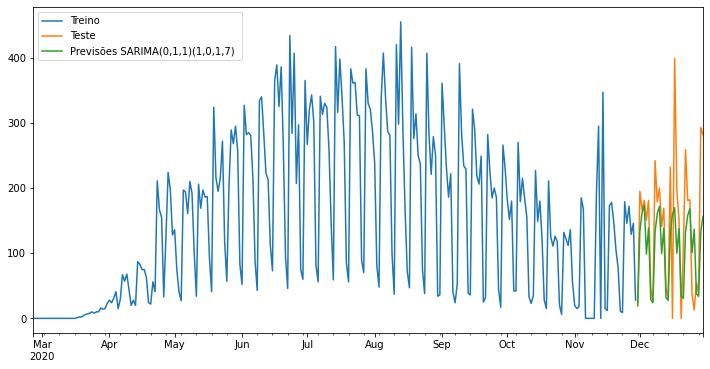

In [57]:
# Plot dos dados de treino, teste e predições
train['deaths'].plot(legend=True, label='Treino')
test['deaths'].plot(legend=True, label='Teste')
predicts.plot(legend=True, figsize=(12,6))

# Mostra o gráfico
plt.show()